### data preprocessing



In [1]:
import numpy as np #可以用它来构建矩阵。Python 列表非常慢，所以当你想做一些矩阵乘法时或者一些矩阵运算，那么对列表的操作就会非常慢。因此当你使用 NumPy 时并创建 NumPy 数组或 NumPy 矩阵，那么你的矩阵运算当然会快得多。
import torch
import torch.nn as nn #负责所有神经网络类别和功能
import pandas as pd #帮助我们预处理数据集
from sklearn.preprocessing import StandardScaler #帮助我们预处理数据集
from torch.utils.data import Dataset #将要使用的另一个类构建我们的 PyTorch 数据集

In [2]:
# Load the dataset using Pandas
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Age                           768 non-null    int64  
 7   Class                         768 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 48.1+ KB


In [9]:
# For x: Extract out the dataset from all the rows (all samples) and all columns except last column (all features).
# For y: Extract out the last column (which is the label)
# Convert both to numpy array using the .values method
x = data.iloc[:,0:-1].values # change the result to array
y_string= list(data.iloc[:,-1])

In [10]:
# Lets have a look some samples from our data
print(x[:3])
print(y_string[:3])

[[  6.  148.   72.   35.    0.   33.6  50. ]
 [  1.   85.   66.   29.    0.   26.6  31. ]
 [  8.  183.   64.    0.    0.   23.3  32. ]]
['positive', 'negative', 'positive']


In [11]:
# Our neural network only understand numbers! So convert the string to labels
y_int = []
for string in y_string:
    if string == 'positive':
        y_int.append(1)
    else:
        y_int.append(0)

In [12]:
print(y_int[:3])

[1, 0, 1]


In [13]:
# Now convert y_int list to an array
y = np.array(y_int, dtype = 'float64') #正在做一个神经网络,并且所有内容都必须采用数组或矩阵格式
#在我们转换成 NumPy 之后，我们还需要将其转换为张量，即 PyTorch 张量

In [14]:
print(y[:3])

[1. 0. 1.]


In [15]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### feature/data normalization
### $x^{\prime}=\frac{x-\mu}{\sigma}$

Why, How and When to Scale your Features:
https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e
这篇文章主要讨论了特征缩放（Feature Scaling）的重要性、方法以及何时应用这些方法。以下是文章的主要内容和关键知识点的解释：

### 为什么需要特征缩放（Why Scaling）

1. **数据特征差异**：在大多数情况下，数据集中的特征在大小、单位和范围上差异很大。由于大多数机器学习算法在计算中使用两点之间的欧几里得距离，这就成了一个问题。

2. **特征影响**：如果不考虑特征的大小，算法在计算距离时只会考虑特征的大小而忽略单位，这会导致不同单位的特征在距离计算中的权重差异很大。

### 如何缩放特征（How to Scale Features）

文章介绍了四种常见的特征缩放方法：

1. **标准化（Standardisation）**：
   - 通过替换值为它们的Z分数来实现。
   - 将特征重新分布，使其均值μ=0，标准差σ=1。
   - `sklearn.preprocessing.scale` 可以帮助我们在Python中实现标准化。

2. **均值归一化（Mean Normalisation）**：
   - 这种分布的值将在-1和1之间，均值μ=0。
   - 标准化和均值归一化可以用于假设零中心数据的算法，如主成分分析（PCA）。

3. **最小-最大缩放（Min-Max Scaling）**：
   - 这种缩放将值限制在0和1之间。

4. **单位向量（Unit Vector）**：
   - 缩放是考虑整个特征向量的长度为单位长度。
   - 最小-最大缩放和单位向量技术产生的值范围是[0,1]。在处理具有硬边界的特征时非常有用，例如，处理图像数据时，颜色范围仅为0到255。

### 何时缩放特征（When to Scale）

1. **距离计算或假设正态性的算法**：任何计算距离或假设正态性的算法，都应该对特征进行缩放。

2. **特定算法的例子**：
   - **k-最近邻（k-nearest neighbors）**：使用欧几里得距离度量时，对特征的大小敏感，因此应该对所有特征进行缩放，以使它们平等地贡献。
   - **主成分分析（PCA）**：PCA试图获得方差最大的特征，而方差对于高幅度特征更高。这会使PCA偏向高幅度特征。
   - **梯度下降**：通过缩放可以加速梯度下降。这是因为θ在小范围内下降得快，在大范围内下降得慢，因此当变量非常不均匀时，会在最优解附近无效地振荡。
   - **基于树的模型**：不是基于距离的模型，可以处理不同范围的特征。因此，在建模树时不需要缩放。
   - **线性判别分析（LDA）和朴素贝叶斯（Naive Bayes）**：这些算法设计上能够处理这个问题，并相应地给特征分配权重。在这些算法中执行特征缩放可能没有太大效果。

文章最后鼓励读者分享他们的最佳实践和经验法则，以供大家参考和学习。

标准化（Standardisation）和均值归一化（Mean Normalisation）是两种不同的特征缩放技术，它们在处理数据时有着不同的方法和目的。以下是它们的主要区别：

1. **标准化（Standardisation）**：
   - **目的**：将特征的分布转换为均值（μ）为0，标准差（σ）为1的分布。这种转换有助于保持数据的原始分布形状和相对差异。
   - **公式**：\[ z = \frac{x - \mu}{\sigma} \]
     其中 \( x \) 是原始数据点，\( \mu \) 是样本均值，\( \sigma \) 是样本标准差。
   - **结果**：数据将被转换为标准正态分布，这意味着大多数数据（约68%）将位于-1和1之间，而不是-1和1之间。
   - **适用情况**：适用于假设数据呈正态分布的算法，如线性回归、逻辑回归、神经网络等。也适用于需要保持数据分布特性的算法，如主成分分析（PCA）。

2. **均值归一化（Mean Normalisation）**：
   - **目的**：将特征缩放到一个固定的范围，通常是[-1, 1]。这种转换改变了数据的分布，使其适应特定的范围。
   - **公式**：\[ x' = \frac{x - \mu}{\sigma} \]
     其中 \( x \) 是原始数据点，\( \mu \) 是样本均值，\( \sigma \) 是样本标准差。然后，将结果乘以2并减去1，以将数据缩放到[-1, 1]范围内。
   - **结果**：数据将被缩放到[-1, 1]的范围内，这有助于某些算法更好地处理数据，特别是那些对数据范围敏感的算法。
   - **适用情况**：适用于需要数据在特定范围内的算法，如支持向量机（SVM）和一些神经网络算法。也适用于数据预处理，以防止数值不稳定或溢出。

总结来说，标准化保持了数据的原始分布特性，而均值归一化则将数据缩放到一个固定的范围。选择哪种方法取决于具体的算法需求和数据特性。



In [16]:
x #这些特征有不同的范围,我们需要对所有特征进行归一化,具有相同的范围。所以我们要做的是将每个特征标准化为一个范围介于-1和1之间。

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [17]:
# Feature Normalization. All features should have the same range of values (-1,1)
sc = StandardScaler()
x = sc.fit_transform(x) #首先，计算平均值以及数据集的标准差,并将此规则应用于您的数据集。因此拟合变换基本上就是计算值并将其应用到您的数据集。

In [18]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.87137393]])

In [19]:
#我们已经完成了特征的标准化。现在我们需要做的是转换非 py 数组,由于我们正在使用 PyTorch，因此将其转换为 PyTorch 张量。我们将使用 PyTorch 构建我们的神经网络。然后我们需要将所有内容转换为 PyTorch 张量。
# Now we convert the arrays to PyTorch tensors
x = torch.tensor(x) #- x.shape is torch.Size([768,7])
# We add an extra dimension to convert this array to 2D
y = torch.tensor(y).unsqueeze(1)
# y = torch.tensor(y)  - y.shape is torch.Size([768]) 现在意识到这只是一个维度。如果你这样做,稍后你将使用二元交叉熵,然后 PyTorch 会告诉你这需要是一个二维矩阵。所以这就是为什么我们需要在这里添加一个维度。我们需要将这个矩阵变成768乘以1。

### `unsqueeze` 的作用

在 PyTorch 中，`unsqueeze` 是一个用于在指定位置插入一个大小为1的新维度的操作。它的主要作用是改变张量的形状（shape），以便与其他张量进行操作时形状匹配。

### 具体示例

假设 `y` 是一个一维张量，其形状为 `[N]`，其中 `N` 是张量的长度。通过使用 `unsqueeze(1)`，我们在第1维（索引从0开始）插入一个新的维度，使其形状变为 `[N, 1]`。

### 代码解释

```python
y = torch.tensor(y).unsqueeze(1)
```

1. `torch.tensor(y)`：将 `y` 转换为一个 PyTorch 张量。
2. `.unsqueeze(1)`：在第1维插入一个新的维度，使张量的形状从 `[N]` 变为 `[N, 1]`。

### 示例

假设 `y` 是一个包含5个元素的一维张量：

```python
import torch

y = [1, 2, 3, 4, 5]
y_tensor = torch.tensor(y)
print(y_tensor.shape)  # 输出: torch.Size([5])

y_unsqueezed = y_tensor.unsqueeze(1)
print(y_unsqueezed.shape)  # 输出: torch.Size([5, 1])
print(y_unsqueezed)
```

输出结果：

```
torch.Size([5])
torch.Size([5, 1])
tensor([[1],
        [2],
        [3],
        [4],
        [5]])
```

可以看到，`unsqueeze(1)` 在第1维插入了一个新的维度，使得张量的形状从 `[5]` 变为 `[5, 1]`。

### 代码优化建议

如果你需要在多个地方使用 `unsqueeze` 操作，可以考虑将其封装成一个函数，以提高代码的可读性和复用性。

```python
import torch

def to_column_vector(tensor):
    """
    将一维张量转换为列向量。
    
    参数:
    tensor (torch.Tensor): 输入的一维张量
    
    返回:
    torch.Tensor: 转换后的列向量
    """
    return tensor.unsqueeze(1)

# 示例用法
y = [1, 2, 3, 4, 5]
y_tensor = torch.tensor(y)
y_column_vector = to_column_vector(y_tensor)
print(y_column_vector.shape)  # 输出: torch.Size([5, 1])
print(y_column_vector)
```

这样可以使代码更加模块化和易读。

In [20]:
x

tensor([[ 0.6399,  0.8483,  0.1496,  ..., -0.6929,  0.2040,  1.4260],
        [-0.8449, -1.1234, -0.1605,  ..., -0.6929, -0.6844, -0.1907],
        [ 1.2339,  1.9437, -0.2639,  ..., -0.6929, -1.1033, -0.1056],
        ...,
        [ 0.3430,  0.0033,  0.1496,  ...,  0.2796, -0.7352, -0.2758],
        [-0.8449,  0.1598, -0.4707,  ..., -0.6929, -0.2402,  1.1707],
        [-0.8449, -0.8730,  0.0462,  ..., -0.6929, -0.2021, -0.8714]],
       dtype=torch.float64)

In [22]:
print(y[:3])

tensor([[1.],
        [0.],
        [1.]], dtype=torch.float64)


In [23]:
print(x.shape)
print(y.shape)

torch.Size([768, 7])
torch.Size([768, 1])


In [24]:
class Dataset(Dataset): #这行代码定义了一个名为 Dataset 的类，并继承自 torch.utils.data.Dataset。注意，这里类名和导入的基类名相同，可能会引起混淆，建议使用不同的名称
  #我们导入了数据集类(from torch.utils.data import Dataset).利用这些数据，所以我们要继承这个类并构建我们的自定义数据集。

    def __init__(self,x,y): #这是类的构造函数 __init__，用于初始化数据集对象。它接受两个参数 x 和 y，并将它们存储为实例变量
        self.x = x
        self.y = y

    def __getitem__(self,index): #这是 __getitem__ 方法，用于根据索引 index 获取数据集中的一个样本。它返回一个元组 (self.x[index], self.y[index])
        # Get one item from the dataset
        return self.x[index], self.y[index]

    def __len__(self): #这是 __len__ 方法，用于返回数据集的大小，即数据集中样本的数量
        return len(self.x)

### 代码解释

```python
from torch.utils.data import Dataset
```
这行代码从 `torch.utils.data` 模块导入 `Dataset` 类，这是 PyTorch 中用于创建自定义数据集的基类。

```python
class Dataset(Dataset):
```
这行代码定义了一个名为 `Dataset` 的类，并继承自 `torch.utils.data.Dataset`。注意，这里类名和导入的基类名相同，可能会引起混淆，建议使用不同的名称。

```python
    def __init__(self, x, y):
        self.x = x
        self.y = y
```
这是类的构造函数 `__init__`，用于初始化数据集对象。它接受两个参数 `x` 和 `y`，并将它们存储为实例变量。

```python
    def __getitem__(self, index):
        # Get one item from the dataset
        return self.x[index], self.y[index]
```
这是 `__getitem__` 方法，用于根据索引 `index` 获取数据集中的一个样本。它返回一个元组 `(self.x[index], self.y[index])`。

```python
    def __len__(self):
        return len(self.x)
```
这是 `__len__` 方法，用于返回数据集的大小，即数据集中样本的数量。

```python
dataset = Dataset(x, y)
```
这行代码创建了一个 `Dataset` 类的实例 `dataset`，并传入数据 `x` 和 `y`。

### 代码优化建议

1. **类名**：为了避免与导入的基类名相同，建议使用不同的类名。
2. **类型注解**：可以添加类型注解，以提高代码的可读性和可维护性。
3. **文档字符串**：可以添加文档字符串，以便更好地描述类和方法的功能。

优化后的代码如下：

```python
from torch.utils.data import Dataset as TorchDataset
from typing import Any, Tuple

class CustomDataset(TorchDataset):
    """
    自定义数据集类，继承自 torch.utils.data.Dataset
    """

    def __init__(self, x: Any, y: Any):
        """
        初始化数据集对象。

        参数:
        x (Any): 输入数据
        y (Any): 标签数据
        """
        self.x = x
        self.y = y

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        """
        根据索引获取数据集中的一个样本。

        参数:
        index (int): 样本索引

        返回:
        Tuple[Any, Any]: 一个包含输入数据和标签的元组
        """
        return self.x[index], self.y[index]

    def __len__(self) -> int:
        """
        返回数据集的大小。

        返回:
        int: 数据集中样本的数量
        """
        return len(self.x)

# 示例用法
# 假设 x 和 y 已经定义
# x = ...
# y = ...
dataset = CustomDataset(x, y)
```

这样可以使代码更加清晰和易读，同时避免类名冲突。

In [25]:
dataset = Dataset(x,y)

In [27]:
dataset

In [26]:
len(dataset)

768

In [28]:
# Load the data to your dataloader for batch processing and shuffling
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                                           batch_size=32,
                                           shuffle=True)

In [29]:
train_loader

In [30]:
# Let's have a look at the data loader
print("There is {} batches in the dataset".format(len(train_loader)))
for (x,y) in train_loader:
    print("For one iteration (batch), there is:")
    print("Data:    {}".format(x.shape))
    print("Labels:  {}".format(y.shape))
    break

There is 24 batches in the dataset
For one iteration (batch), there is:
Data:    torch.Size([32, 7])
Labels:  torch.Size([32, 1])


![demo](https://user-images.githubusercontent.com/30661597/60379583-246e5e80-9a68-11e9-8b7f-a4294234c201.png)

数据中有七个特征，我们有几个隐藏层，那么我们最终的输出层只有一个神经元。
所以这个数字要么是0，要么是1，或者换句话说，是或否。
所以我们要预测一个人是否患有糖尿病。

### building the network

从NN点模型类继承。那么让我们进入初始化函数。因此，再次定义 init，并且不要忘记 self。那么现在这个类的输入和参数是什么？
当我们想要初始化这个类时，我们应该给出什么论据？因此我们需要给出输入的数量，功能，
以及输出特征的数量。因此输出特征。现在隐藏功能的数量，我们只是要在内部进行设计。但你也可以隐藏第一层，然后隐藏第二层下划线。第三层也是如此。
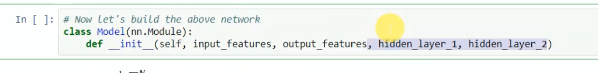
所以你可以这样做或者您可以直接在类内部对其进行硬编码。

我们要做的就是直接传递类内隐藏神经元的数量。当我们初始化这个类时，我们只需要给出输入特征的数量以及输出特征的数量。

那么我们的神经网络的属性是什么？基本上，他们是我们的层。它有哪些功能,我们的神经网络基本上是前向传播函数。

In [37]:
# Now let's build the above network
class Model(nn.Module):
    def __init__(self, input_features,output_features):
        super(Model, self).__init__() #我们再次从这个父母那里继承了类，NN 点模型类。所以我们想利用所有的功能,此 NN 点模型类并将其传递给我们的模型类，我们正在创建的这个类。 所以使用super
        self.fc1 = nn.Linear(input_features, 5) #每个类都需要有一些属性和一些功能。
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, output_features)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

现在，我们不需要建造或者编写我们的反向传播函数因为 PyTorch 会自动为我们完成这件事。我们要做的就是提供四个传播函数和 PyTorch，自动进行反向传播。因此它遵循这里的顺序。你放的，所以这里，这是我们放每一行的顺序。当反向传播发生时，它只是遵循相反的顺序前向传播函数。您可以定义自定义反向传播函数，但我们不会在这门课上这样做.

### 代码解释

```python
import torch.nn as nn
```
这行代码导入了 `torch.nn` 模块，这是 PyTorch 中用于构建神经网络的模块。

```python
class Model(nn.Module):
```
这行代码定义了一个名为 `Model` 的类，并继承自 `torch.nn.Module`。这是创建自定义神经网络模型的标准做法。

```python
    def __init__(self, input_features):
        super(Model, self).__init__()
```
这是类的构造函数 `__init__`，用于初始化模型对象。`super(Model, self).__init__()` 调用父类 `nn.Module` 的构造函数。

```python
        self.fc1 = nn.Linear(input_features, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, 1)
```
这几行代码定义了四个全连接层（fully connected layers），分别是：
- `self.fc1`：输入特征数为 `input_features`，输出特征数为 5。
- `self.fc2`：输入特征数为 5，输出特征数为 4。
- `self.fc3`：输入特征数为 4，输出特征数为 3。
- `self.fc4`：输入特征数为 3，输出特征数为 1。

```python
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
```
这两行代码定义了两个激活函数：
- `self.sigmoid`：Sigmoid 激活函数。
- `self.tanh`：Tanh 激活函数。

```python
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out
```
这是 `forward` 方法，用于定义模型的前向传播过程。输入 `x` 依次通过各个全连接层和激活函数，最终输出 `out`。

### 代码优化建议

1. **激活函数选择**：在隐藏层中使用 Tanh 激活函数是可以的，但在输出层使用 Sigmoid 激活函数时，通常用于二分类问题。如果是回归问题，可能需要使用不同的激活函数或不使用激活函数。
2. **模块化**：可以将重复的代码块合并，以减少代码行数。
3. **类型注解**：可以添加类型注解，以提高代码的可读性和可维护性。

优化后的代码如下：

```python
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_features: int):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_features, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# 示例用法
# model = Model(input_features=10)
# x = torch.randn(1, 10)
# output = model(x)
```

这样可以使代码更加简洁和易读，同时保持功能不变。如果你有特定的任务需求（例如分类或回归），可以根据需求调整激活函数。

$H_{p}(q)=-\frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot \log \left(p\left(y_{i}\right)\right)+\left(1-y_{i}\right) \cdot \log \left(1-p\left(y_{i}\right)\right)$


cost = -(Y * torch.log(hypothesis) + (1 - Y) * torch.log(1 - hypothesis)).mean()

In [33]:
x.shape[1]

7

In [38]:
# Create the network (an object of the Net class)
net = Model(7,1)
#In Binary Cross Entropy: the input and output should have the same shape
#size_average = True --> the losses are averaged over observations for each minibatch
# criterion = torch.nn.BCELoss(size_average=True)   #size_average=True 表示损失将对每个小批量中的观察值进行平均。需要注意的是，size_average 参数在较新的版本中已经被弃用，建议使用 reduction='mean'
criterion = nn.BCELoss(size_average=True)
# We will use SGD with momentum with a learning rate of 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)#这行代码定义了一个使用动量的随机梯度下降（SGD）优化器 optimizer，学习率为 0.1，动量为 0.9。优化器将用于更新 net 模型的参数

In [45]:
# Train the network
num_epochs = 200
for epoch in range(num_epochs):
    for inputs,labels in train_loader:
        inputs = inputs.float()
        labels = labels.float()
        # Feed Forward
        output = net(inputs)
        # Loss Calculation
        loss = criterion(output, labels)
        # Clear the gradient buffer (we don't want to accumulate gradients)
        optimizer.zero_grad() #这行代码清除优化器的梯度缓存，以防止梯度累积
        # Backpropagation
        loss.backward() #这行代码执行反向传播，计算梯度。每次反向传播之前调用 optimizer.zero_grad() 可以确保每次参数更新只使用当前批次的梯度，从而保证梯度计算的正确性
        # Weight Update: w <-- w - lr * gradient
        optimizer.step()

    #Accuracy
    # Since we are using a sigmoid, we will need to perform some thresholding
    output = (output>0.5).float()
    # Accuracy: (output == labels).float().sum() / output.shape[0]
    accuracy = (output == labels).float().mean()
    # Print statistics
    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss, accuracy))

Epoch 1/200, Loss: 0.487, Accuracy: 0.781
Epoch 2/200, Loss: 0.554, Accuracy: 0.656
Epoch 3/200, Loss: 0.423, Accuracy: 0.781
Epoch 4/200, Loss: 0.473, Accuracy: 0.781
Epoch 5/200, Loss: 0.583, Accuracy: 0.750
Epoch 6/200, Loss: 0.477, Accuracy: 0.812
Epoch 7/200, Loss: 0.399, Accuracy: 0.906
Epoch 8/200, Loss: 0.442, Accuracy: 0.719
Epoch 9/200, Loss: 0.411, Accuracy: 0.844
Epoch 10/200, Loss: 0.437, Accuracy: 0.750
Epoch 11/200, Loss: 0.631, Accuracy: 0.688
Epoch 12/200, Loss: 0.573, Accuracy: 0.688
Epoch 13/200, Loss: 0.471, Accuracy: 0.781
Epoch 14/200, Loss: 0.496, Accuracy: 0.781
Epoch 15/200, Loss: 0.566, Accuracy: 0.750
Epoch 16/200, Loss: 0.436, Accuracy: 0.750
Epoch 17/200, Loss: 0.527, Accuracy: 0.750
Epoch 18/200, Loss: 0.588, Accuracy: 0.750
Epoch 19/200, Loss: 0.387, Accuracy: 0.844
Epoch 20/200, Loss: 0.429, Accuracy: 0.812
Epoch 21/200, Loss: 0.469, Accuracy: 0.781
Epoch 22/200, Loss: 0.570, Accuracy: 0.719
Epoch 23/200, Loss: 0.473, Accuracy: 0.750
Epoch 24/200, Loss: 

### 解释 `optimizer.zero_grad()`

在 PyTorch 中，梯度是通过反向传播计算的，并且默认情况下，梯度会累积（即相加）在每次调用 `backward()` 时。这意味着如果不清除之前的梯度，新的梯度会与之前的梯度相加，从而导致梯度值不正确。

#### 为什么需要清除梯度缓存？

在训练神经网络的过程中，每次更新模型参数时，我们希望使用当前批次数据计算的梯度来更新参数，而不是累积之前批次的梯度。因此，在每次反向传播之前，我们需要清除之前计算的梯度，以确保每次参数更新只使用当前批次的梯度。

### 具体步骤

1. **前向传播**：计算模型的输出。
2. **计算损失**：根据模型的输出和真实标签计算损失。
3. **清除梯度缓存**：调用 `optimizer.zero_grad()` 清除之前计算的梯度。
4. **反向传播**：调用 `loss.backward()` 计算当前批次的梯度。
5. **更新参数**：调用 `optimizer.step()` 根据计算的梯度更新模型参数。

### 总结

`optimizer.zero_grad()` 的作用是清除优化器的梯度缓存，以防止梯度累积。每次反向传播之前调用 `optimizer.zero_grad()` 可以确保每次参数更新只使用当前批次的梯度，从而保证梯度计算的正确性。

In [39]:
aa = torch.tensor([3,4,5])

In [40]:
aa

tensor([3, 4, 5])

In [44]:
aa>3

tensor([False,  True,  True])

In [48]:
bb =  torch.tensor([3,1,5])

In [49]:
aa==bb

tensor([ True, False,  True])